In [1]:
import pandas as pd
import seaborn as sns
import glob 
import os 
import numpy as np
import matplotlib.pyplot as plt
color_pal=sns.color_palette()
plt.style.use('fivethirtyeight')

# Task 1: Prepare the datasets

In [2]:
def extractFiles(path): 

    all_files = glob.glob(os.path.join(path , "*.csv"))
    return all_files 

In [3]:
path = r'C:\Users\Rahul Nagarajan\Desktop\MS Project\EEG Authentication\Test_Data' 
all_files = extractFiles(path)

In [4]:
def ProcessDF(all_files):
    li = []

    for filename in all_files:
        df = pd.read_csv(filename, skiprows=1, index_col=None, header=0)
        #Epoc X has 14 channels and sampling rate of 128hz
        df = df.iloc[:, [4,5,6,7,8,9,10,11,12,13,14,15,16,17]]
        li.append(df)
    return li

In [5]:
df_list = ProcessDF(all_files)

In [6]:
for count, dataframe in enumerate(df_list):
    dataframe.to_csv(f"dataframe_{count}.csv", index=False)

In [7]:
df_path = r'C:\Users\Rahul Nagarajan\Desktop\MS Project\EEG Authentication' 

In [8]:
all_dfs = extractFiles(df_path)

# Task 2: Feature Extraction

In [9]:
import eeglib

In [10]:
#Preprocessing the data with a highpass filter of 1hz and lowpass filter of 50hz
fdfs = []
for dfs in all_dfs: 
 helper = eeglib.helpers.CSVHelper(dfs, sampleRate=128, normalize=True, highpass=1, lowpass=50)
 wrapper = eeglib.wrapper.Wrapper(helper)
 wrapper.addFeature.PFD(hideArgs=True)
 data = wrapper.getAllFeatures()
 fdfs.append(data)

In [11]:
finaldfs = []
for dfs in fdfs: 
 finaldfs.append(dfs)

In [12]:
df_merged = pd.concat(finaldfs, axis=0, ignore_index=True)

In [13]:
df_merged

,PFD_0,PFD_1,PFD_2,PFD_3,PFD_4,PFD_5,PFD_6,PFD_7,PFD_8,PFD_9,PFD_10,PFD_11,PFD_12,PFD_13
0,1.033205,1.035551,1.033205,1.032027,1.033793,1.034966,1.031436,1.035551,1.035551,1.035551,1.033205,1.032616,1.033205,1.030845
1,1.032616,1.034966,1.033793,1.033793,1.037301,1.031436,1.033793,1.034380,1.034380,1.033205,1.033205,1.034380,1.032027,1.032616
2,1.032616,1.030252,1.030252,1.032616,1.036135,1.033793,1.037301,1.036135,1.032027,1.035551,1.033793,1.031436,1.029659,1.030252
3,1.030845,1.035551,1.032027,1.034380,1.036719,1.033793,1.030845,1.036135,1.036719,1.035551,1.032616,1.034380,1.030845,1.033205
4,1.033793,1.034380,1.036719,1.036719,1.036719,1.036719,1.039622,1.040201,1.036719,1.034380,1.036719,1.037883,1.033205,1.036719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,1.028470,1.029065,1.020646,1.024879,1.023674,1.025480,1.020646,1.015748,1.020646,1.022466,1.018817,1.012653,1.021253,1.016363
423,1.027874,1.033793,1.029659,1.032027,1.024879,1.018817,1.023071,1.014513,1.024277,1.032027,1.029065,1.027874,1.035551,1.030252
424,1.029659,1.027277,1.023674,1.033205,1.026679,1.026679,1.021860,1.019427,1.036719,1.029659,1.029659,1.022466,1.029659,1.024879
425,1.027874,1.024879,1.026080,1.029659,1.027277,1.027277,1.016978,1.022466,1.031436,1.032027,1.031436,1.034966,1.027277,1.028470


<AxesSubplot:title={'center':'Petrosian Fractal Dimension'}>

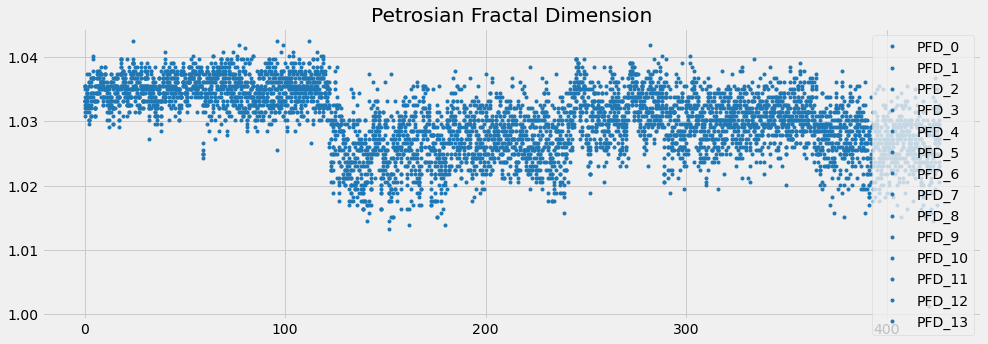

In [14]:
df_merged.plot(style='.', figsize=(15,5), color=color_pal[0], title='Petrosian Fractal Dimension') 

# Task 3: Preprocessing 

In [15]:
#Under the assumption that only Cris is authenticated 
df_merged.loc[0:60, 'Authenticated'] = 'True'
df_merged.loc[61:, 'Authenticated'] = 'False'

In [16]:
df_merged

,PFD_0,PFD_1,PFD_2,PFD_3,PFD_4,PFD_5,PFD_6,PFD_7,PFD_8,PFD_9,PFD_10,PFD_11,PFD_12,PFD_13,Authenticated
0,1.033205,1.035551,1.033205,1.032027,1.033793,1.034966,1.031436,1.035551,1.035551,1.035551,1.033205,1.032616,1.033205,1.030845,True
1,1.032616,1.034966,1.033793,1.033793,1.037301,1.031436,1.033793,1.034380,1.034380,1.033205,1.033205,1.034380,1.032027,1.032616,True
2,1.032616,1.030252,1.030252,1.032616,1.036135,1.033793,1.037301,1.036135,1.032027,1.035551,1.033793,1.031436,1.029659,1.030252,True
3,1.030845,1.035551,1.032027,1.034380,1.036719,1.033793,1.030845,1.036135,1.036719,1.035551,1.032616,1.034380,1.030845,1.033205,True
4,1.033793,1.034380,1.036719,1.036719,1.036719,1.036719,1.039622,1.040201,1.036719,1.034380,1.036719,1.037883,1.033205,1.036719,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,1.028470,1.029065,1.020646,1.024879,1.023674,1.025480,1.020646,1.015748,1.020646,1.022466,1.018817,1.012653,1.021253,1.016363,False
423,1.027874,1.033793,1.029659,1.032027,1.024879,1.018817,1.023071,1.014513,1.024277,1.032027,1.029065,1.027874,1.035551,1.030252,False
424,1.029659,1.027277,1.023674,1.033205,1.026679,1.026679,1.021860,1.019427,1.036719,1.029659,1.029659,1.022466,1.029659,1.024879,False
425,1.027874,1.024879,1.026080,1.029659,1.027277,1.027277,1.016978,1.022466,1.031436,1.032027,1.031436,1.034966,1.027277,1.028470,False


<AxesSubplot:xlabel='Authenticated', ylabel='count'>

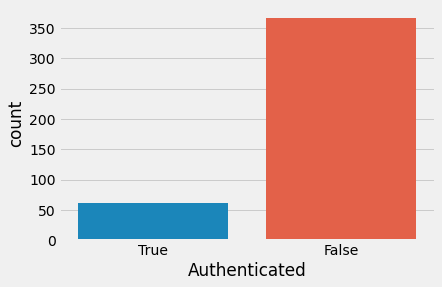

In [17]:
sns.countplot(x='Authenticated', data=df_merged)

In [18]:
labels = ({'True':1,'False':0})
df_encoded = df_merged.replace(labels)

In [19]:
df_encoded

,PFD_0,PFD_1,PFD_2,PFD_3,PFD_4,PFD_5,PFD_6,PFD_7,PFD_8,PFD_9,PFD_10,PFD_11,PFD_12,PFD_13,Authenticated
0,1.033205,1.035551,1.033205,1.032027,1.033793,1.034966,1.031436,1.035551,1.035551,1.035551,1.033205,1.032616,1.033205,1.030845,1
1,1.032616,1.034966,1.033793,1.033793,1.037301,1.031436,1.033793,1.034380,1.034380,1.033205,1.033205,1.034380,1.032027,1.032616,1
2,1.032616,1.030252,1.030252,1.032616,1.036135,1.033793,1.037301,1.036135,1.032027,1.035551,1.033793,1.031436,1.029659,1.030252,1
3,1.030845,1.035551,1.032027,1.034380,1.036719,1.033793,1.030845,1.036135,1.036719,1.035551,1.032616,1.034380,1.030845,1.033205,1
4,1.033793,1.034380,1.036719,1.036719,1.036719,1.036719,1.039622,1.040201,1.036719,1.034380,1.036719,1.037883,1.033205,1.036719,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,1.028470,1.029065,1.020646,1.024879,1.023674,1.025480,1.020646,1.015748,1.020646,1.022466,1.018817,1.012653,1.021253,1.016363,0
423,1.027874,1.033793,1.029659,1.032027,1.024879,1.018817,1.023071,1.014513,1.024277,1.032027,1.029065,1.027874,1.035551,1.030252,0
424,1.029659,1.027277,1.023674,1.033205,1.026679,1.026679,1.021860,1.019427,1.036719,1.029659,1.029659,1.022466,1.029659,1.024879,0
425,1.027874,1.024879,1.026080,1.029659,1.027277,1.027277,1.016978,1.022466,1.031436,1.032027,1.031436,1.034966,1.027277,1.028470,0


In [20]:
X = df_encoded.drop('Authenticated', axis=1).copy()
y = df_encoded['Authenticated'].copy()

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

# Task 4: Modelling

In [22]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
optimization_dict = {'max_depth': [1,1,1], 
                     'n_estimators': [60,120,180],
                     'colsample_bytree': [0.1, 0.1]
                    }

xgb_model = XGBClassifier()
model = GridSearchCV(xgb_model, optimization_dict, 
                     scoring='accuracy', verbose=1)
model.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_

# Task 5: Save and load Model

In [23]:
from joblib import dump, load
xgb = XGBClassifier() 
gvc = GridSearchCV(xgb, optimization_dict, refit=True) 
gvc.fit(X_train, y_train)
estimator = gvc.best_estimator_
dump(estimator, "Cris.joblib")
estimator = load("Cris.joblib")

# Task 6: Results 

In [24]:
# make predictions for test data
y_pred = estimator.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.02%


# Task 7: Authentication Test

In [25]:
def Tester(filename):
    helper = eeglib.helpers.CSVHelper(filename, sampleRate=128, normalize=True, highpass=1, lowpass=50)
    wrapper = eeglib.wrapper.Wrapper(helper)
    wrapper.addFeature.PFD(hideArgs=True)
    data = wrapper.getAllFeatures()
    return data

In [26]:
featureExtract = Tester('dataframe_0.csv')

In [27]:
pred = estimator.predict(featureExtract)

In [28]:
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1]


In [29]:
from collections import Counter
def authenticateUser(arr):
    count = Counter(arr)
    size = len(arr)
    for (key,val) in count.items():
         if (val > (size/2)): 
             return key

In [30]:
res = authenticateUser(pred)
if (res==0):
 print('Not Authenticated')
else: 
 print('Authenticated')

Authenticated
